<a href="https://colab.research.google.com/github/MautKaFarishta/Tweeter_Sentiment_Analysis/blob/main/DisasterTweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***`Natural Language Processing with Disaster Tweets`***

https://www.kaggle.com/c/nlp-getting-started/overview



In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [159]:
data = pd.read_csv('train.csv')
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [160]:
print(data['location'].isnull().sum())
data['keyword'].isnull().sum()

2533


61

In [161]:
data['keyword'].fillna("nothing",inplace = True)

In [162]:
data['keyword'].isnull().sum()

0

In [163]:
total = set()
for sentence in data['text'].items():
  for word in sentence[1].split():
    total.add(word)

len(total)

31924

In [164]:
def cleaned(text):
    text = text.str.lower() # lowercase
    text = text.str.replace(r"\#","") # replaces hashtags
    text = text.str.replace(r"http\S+","URL")  # remove URL addresses
    text = text.str.replace(r"@","")
    text = text.str.replace(r"!","")
    text = text.str.replace(r"!","")
    text = text.str.replace(r"[^A-Za-z0-9()!?\'\`\"]", " ")
    text = text.str.replace("\s{2,}", " ")
    return text

In [165]:
data['text'] = cleaned(data['text'])

In [166]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk import word_tokenize
nltk.download('punkt')

stopWords = stopwords.words('english')
print(stopWords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over',

In [167]:
def remove_stopwords(text):
  word_tokens = word_tokenize(text)
  filtered_sentence = [w for w in word_tokens if not w in stopWords]
  return " ".join(filtered_sentence)

In [168]:
data['text'] = data['text'].apply(lambda x : remove_stopwords(x))
data['text'].head()

0         deeds reason earthquake may allah forgive us
1                forest fire near la ronge sask canada
2    residents asked 'shelter place ' notified offi...
3    13 000 people receive wildfires evacuation ord...
4    got sent photo ruby alaska smoke wildfires pou...
Name: text, dtype: object

In [169]:
from sklearn.metrics import auc,accuracy_score,roc_curve,confusion_matrix,f1_score
from sklearn.model_selection import train_test_split

In [170]:
y = data['target']
X = data.drop(['target'],axis = 1)

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [172]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

vect = TfidfVectorizer(max_features = 3000 , ngram_range=(1,3))

vect.fit(X['text'])

sparse_text_tr = vect.transform(X_train['text'])
sparse_text_te = vect.transform(X_test['text'])

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [183]:
log = LogisticRegression()

p = {'penalty':['l1','l2'],'C':[0.0001,0.001,0.01,0.1,1,10,100,1000],'class_weight':[None,'balanced']}

G = GridSearchCV(log,p,verbose=2,cv=5)

G.fit(sparse_text_tr,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=0.0001, class_weight=None, penalty=l1 .........................
[CV] .......... C=0.0001, class_weight=None, penalty=l1, total=   0.0s
[CV] C=0.0001, class_weight=None, penalty=l1 .........................
[CV] .......... C=0.0001, class_weight=None, penalty=l1, total=   0.0s
[CV] C=0.0001, class_weight=None, penalty=l1 .........................
[CV] .......... C=0.0001, class_weight=None, penalty=l1, total=   0.0s
[CV] C=0.0001, class_weight=None, penalty=l1 .........................
[CV] .......... C=0.0001, class_weight=None, penalty=l1, total=   0.0s
[CV] C=0.0001, class_weight=None, penalty=l1 .........................
[CV] .......... C=0.0001, class_weight=None, penalty=l1, total=   0.0s
[CV] C=0.0001, class_weight=None, penalty=l2 .........................
[CV] .......... C=0.0001, class_weight=None, penalty=l2, total=   0.0s
[CV] C=0.0001, class_weight=None, penalty=l2 .........................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........... C=0.001, class_weight=None, penalty=l2, total=   0.0s
[CV] C=0.001, class_weight=None, penalty=l2 ..........................
[CV] ........... C=0.001, class_weight=None, penalty=l2, total=   0.0s
[CV] C=0.001, class_weight=None, penalty=l2 ..........................
[CV] ........... C=0.001, class_weight=None, penalty=l2, total=   0.0s
[CV] C=0.001, class_weight=None, penalty=l2 ..........................
[CV] ........... C=0.001, class_weight=None, penalty=l2, total=   0.0s
[CV] C=0.001, class_weight=None, penalty=l2 ..........................
[CV] ........... C=0.001, class_weight=None, penalty=l2, total=   0.0s
[CV] C=0.001, class_weight=balanced, penalty=l1 ......................
[CV] ....... C=0.001, class_weight=balanced, penalty=l1, total=   0.0s
[CV] C=0.001, class_weight=balanced, penalty=l1 ......................
[CV] ....... C=0.001, class_weight=balanced, penalty=l1, total=   0.0s
[CV] C=0.001, class_weight=balanced, penalty=l1 ......................
[CV] .

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    6.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [184]:
G.best_params_

{'C': 1, 'class_weight': None, 'penalty': 'l2'}

In [185]:
final = LogisticRegression(C=1,penalty='l2')

final.fit(sparse_text_tr,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [177]:
pre = final.predict(sparse_text_te)
pre_t = final.predict(sparse_text_tr)

Logistic Regression F1-Score :  0.7441860465116279 



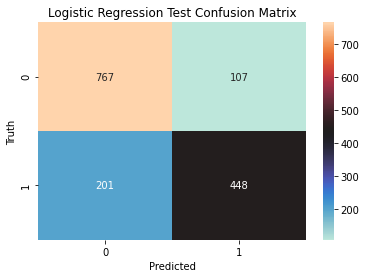

In [178]:
sb.heatmap(confusion_matrix(y_test,pre),annot=True,fmt=".5g",cmap='icefire')
plt.title("Logistic Regression Test Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Truth')

LR_f1 = f1_score(y_test,pre)

print("Logistic Regression F1-Score : ",LR_f1,"\n")

Logistic Regression F1-Score :  0.8252527336496802 



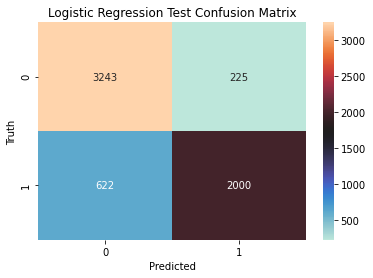

In [179]:
sb.heatmap(confusion_matrix(y_train,pre_t),annot=True,fmt=".5g",cmap='icefire')
plt.title("Logistic Regression Test Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Truth')

LR_f1 = f1_score(y_train,pre_t)

print("Logistic Regression F1-Score : ",LR_f1,"\n")

In [186]:
final_nb = MultinomialNB(alpha=1)

final_nb.fit(sparse_text_tr,y_train)

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [187]:
pre = final.predict(sparse_text_te)
pre_t = final.predict(sparse_text_tr)

Logistic Regression F1-Score :  0.7441860465116279 



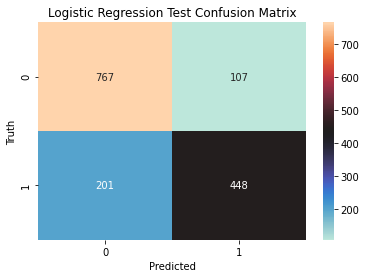

In [188]:
sb.heatmap(confusion_matrix(y_test,pre),annot=True,fmt=".5g",cmap='icefire')
plt.title("Logistic Regression Test Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Truth')

LR_f1 = f1_score(y_test,pre)

print("Logistic Regression F1-Score : ",LR_f1,"\n")

Logistic Regression F1-Score :  0.8252527336496802 



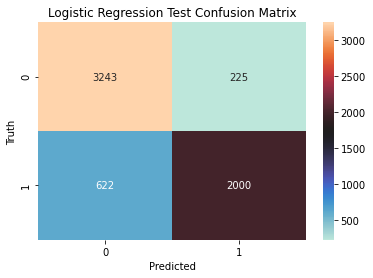

In [189]:
sb.heatmap(confusion_matrix(y_train,pre_t),annot=True,fmt=".5g",cmap='icefire')
plt.title("Logistic Regression Test Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Truth')

LR_f1 = f1_score(y_train,pre_t)

print("Logistic Regression F1-Score : ",LR_f1,"\n")